In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

In [57]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root = './data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root = './data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

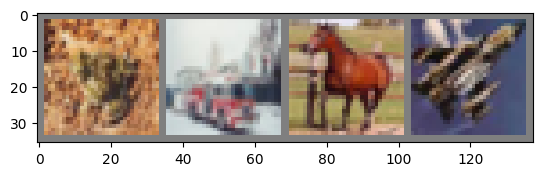

frog       truck      horse      plane     


In [58]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:10s}' for j in range(batch_size)))


In [51]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv1 = nn.Conv2d(3, 60, 5)
        self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        #self.conv2 = nn.Conv2d(60, 16, 5)
        self.conv2 = nn.Conv2d(60, 32, 5)
        self.fc1 = nn.Linear(5 * 5 * 32, 240)
        self.fc2 = nn.Linear(240, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [50]:
device = torch.device('cpu')
net.to(device)
print(device)
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        input, label = data[0].to(device), data[1].to(device) #
        optimizer.zero_grad()

        output = net(input)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f"{epoch + 1} : {i + 1:5d} , loss: {running_loss / 2000:.3f}")
            running_loss = 0.0
print("Finish Training")

cpu
1 :  2000 , loss: 2.052
1 :  4000 , loss: 1.674
1 :  6000 , loss: 1.529
1 :  8000 , loss: 1.450
1 : 10000 , loss: 1.362
1 : 12000 , loss: 1.324
2 :  2000 , loss: 1.219
2 :  4000 , loss: 1.161
2 :  6000 , loss: 1.142
2 :  8000 , loss: 1.112
2 : 10000 , loss: 1.093
2 : 12000 , loss: 1.069
Finish Training


In [54]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
net.to(device) #
for epoch in range(5):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        input, label = data[0].to(device), data[1].to(device) #
        optimizer.zero_grad()

        output = net(input)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f"{epoch + 1} : {i + 1:5d} , loss: {running_loss / 2000:.3f}")
            running_loss = 0.0
print("Finish Training")





cuda:0
1 :  2000 , loss: 0.697
1 :  4000 , loss: 0.696
1 :  6000 , loss: 0.723
1 :  8000 , loss: 0.718
1 : 10000 , loss: 0.720
1 : 12000 , loss: 0.714
2 :  2000 , loss: 0.603
2 :  4000 , loss: 0.602
2 :  6000 , loss: 0.621
2 :  8000 , loss: 0.657
2 : 10000 , loss: 0.647
2 : 12000 , loss: 0.654
3 :  2000 , loss: 0.502
3 :  4000 , loss: 0.545
3 :  6000 , loss: 0.567
3 :  8000 , loss: 0.591
3 : 10000 , loss: 0.577
3 : 12000 , loss: 0.583
4 :  2000 , loss: 0.452
4 :  4000 , loss: 0.463
4 :  6000 , loss: 0.489
4 :  8000 , loss: 0.546
4 : 10000 , loss: 0.523
4 : 12000 , loss: 0.524
5 :  2000 , loss: 0.393
5 :  4000 , loss: 0.420
5 :  6000 , loss: 0.442
5 :  8000 , loss: 0.478
5 : 10000 , loss: 0.451
5 : 12000 , loss: 0.480
Finish Training


In [55]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

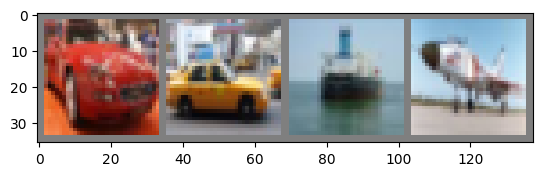

True labels car        car        ship       plane     


In [67]:
# dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print("True labels", ' '.join(f'{classes[labels[i]]:10s}' for i in range(4)))

In [61]:
net = Net()
PATH = './cifar_net.pth'
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [68]:
output = net(images)
_, predicted = torch.max(output, 1)
print("Predicted labels: ", ' '.join(f'{classes[predicted[j]]:10s}' for j in range(4)))

Predicted labels:  car        car        ship       plane     


In [69]:
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
with torch.no_grad():
    for data in testloader:
        images, labels = data
        output = net(images)
        _, predicted = torch.max(output, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        for label, pred in zip(labels, predicted):
            total_pred[classes[label]] += 1
            if pred == label:
                correct_pred[classes[label]] += 1

print(f'Accuracy: {100 * correct /total:5f}%')
for classname in classes:
    print(f"{classname} : {correct_pred[classname]} correct in {total_pred[classname]},"
           f"acc: {100 * correct_pred[classname] / total_pred[classname]}")

Accuracy: 71.330000%
plane : 671 correct in 1000,acc: 67.1
car : 812 correct in 1000,acc: 81.2
bird : 558 correct in 1000,acc: 55.8
cat : 529 correct in 1000,acc: 52.9
deer : 687 correct in 1000,acc: 68.7
dog : 546 correct in 1000,acc: 54.6
frog : 837 correct in 1000,acc: 83.7
horse : 786 correct in 1000,acc: 78.6
ship : 836 correct in 1000,acc: 83.6
truck : 871 correct in 1000,acc: 87.1


cuda
